In [37]:
def normaliz(df):
    
    df['세력합'] = df['외인계'] + df['기관계']
    df['기타계'] = df['기타계'] - df['국가']
    
    df = df[::-1]
    
    #누적 수량
    header= ['개인', '세력합', '외인계', '기관계', '금융투자', '사모펀드', '연기금',  '보험', '투신', '은행', '기타금융', '국가', '기타법인', '기타계']
    header1= ['개인누적', '세력합누적', '외국인누적', '기관합누적', '금융투자누적', '사모펀드누적', '연기금누적', '보험누적', '투신누적', '은행누적', '기타금융누적', '국가누적', '기타법인누적', '기타누적']
    df[header1] = df[header].cumsum()
    
    #각 주체별 최소 수량
    header2= ['개인최소', '세력합최소', '외국인최소', '기관합최소', '금융투자최소', '사모펀드최소', '연기금최소', '보험최소', '투신최소', '은행최소', '기타금융최소', '국가최소', '기타법인최소', '기타최소']
    df[header2] = df[header1].cummin()
    
    # 각 주체별 현재 추정 보유 수량
    df['개인수량'] = df['개인누적'] - df['개인최소']
    df['세력합수량'] = df['세력합누적'] - df['세력합최소']
    df['외국인수량'] = df['외국인누적'] - df['외국인최소']
    df['기관합수량'] = df['기관합누적'] - df['기관합최소']
    df['금융투자수량'] = df['금융투자누적'] - df['금융투자최소']
    df['사모펀드수량'] = df['사모펀드누적'] - df['사모펀드최소']
    df['연기금수량'] = df['연기금누적'] - df['연기금최소']
    df['보험수량'] = df['보험누적'] - df['보험최소']
    df['투신수량'] = df['투신누적'] - df['투신최소']
    df['은행수량'] = df['은행누적'] - df['은행최소']
    df['기타금융수량'] = df['기타금융누적'] - df['기타금융최소']
    df['국가수량'] = df['국가누적'] - df['국가최소']
    df['기타법인수량'] = df['기타법인누적'] - df['기타법인최소']
    df['기타수량'] = df['기타누적'] - df['기타최소']
    
    # 각 주체별 최고 고점 수량
    header3 = ['개인수량', '세력합수량', '외국인수량', '기관합수량', '금융투자수량', '사모펀드수량', '연기금수량', '보험수량', '투신수량', '은행수량', '기타금융수량', '국가수량', '기타법인수량', '기타수량']
    header4= ['개인고점', '세력합고점', '외국인고점', '기관합고점', '금융투자고점', '사모펀드고점', '연기금고점', '보험고점', '투신고점', '은행고점', '기타금융고점', '국가고점', '기타법인고점', '기타고점']
    df[header4] = df[header3].cummax()
    
    # 각 주체별 분산 비율(정규화)
    df['개인분산'] = df['개인수량']/df['개인고점']
    df['세력합분산'] = df['세력합수량']/df['세력합고점']
    df['외국인분산'] = df['외국인수량']/df['외국인고점']
    df['기관합분산'] = df['기관합수량']/df['기관합고점']
    df['금융투자분산'] = df['금융투자수량']/df['금융투자고점']
    df['사모펀드분산'] = df['사모펀드수량']/df['사모펀드고점']
    df['연기금분산'] = df['연기금수량']/df['연기금고점']
    df['보험분산'] = df['보험수량']/df['보험고점']
    df['투신분산'] = df['투신수량']/df['투신고점']
    df['기타금융분산'] = df['기타금융수량']/df['기타금융고점']
    df['은행분산'] = df['은행수량']/df['은행고점']
    df['국가분산'] = df['국가수량']/df['국가고점']
    df['기타법인분산'] = df['기타법인수량']/df['기타법인고점']
    df['기타분산'] = df['기타수량']/df['기타고점']
    
    header5 = ['개인분산', '세력합분산', '외국인분산', '기관합분산', '금융투자분산', '사모펀드분산', '연기금분산', '보험분산', '투신분산', '은행분산', '기타금융분산', '국가분산', '기타법인분산', '기타분산']

    df_new = df[header5]
       
    return df_new

In [26]:
%matplotlib inline
import sqlite3
import pandas as pd

In [30]:
con = sqlite3.connect("c:/Users/user/code/db/investor.sqlite")
dforg = pd.read_sql("SELECT 일자, 종가, 개인, 증권 as 금융투자, 사모펀드, 기금 as 연기금, 보험, 투신, 은행, 종금 as 기타금융, 국가외 as 국가, 기타법인, 기관 as 기관계, 외인계, 기타계 FROM '쌍용차' ORDER BY 일자 DESC", con, index_col='일자', parse_dates={'일자': '%Y-%m-%d'})
con.close()

In [38]:
newdf = normaliz(dforg)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

In [33]:
newdf[::-1]

,개인분산,세력합분산,외국인분산,기관합분산,금융투자분산,사모펀드분산,연기금분산,보험분산,투신분산,은행분산,기타금융분산,국가분산,기타법인분산,기타분산
일자,,,,,,,,,,,,,,
2019-03-19,0.942905,0.507527,0.347346,0.273201,1.000000,0.000519,0.623713,0.306144,0.128532,0.041614,0.000352,0.008998,0.000000,0.000000
2019-03-18,0.946180,0.494819,0.334319,0.273393,1.000000,0.000519,0.621942,0.313084,0.128536,0.041614,0.000352,0.008998,0.000000,0.000000
2019-03-15,0.946489,0.493551,0.334670,0.271214,1.000000,0.000519,0.619671,0.313181,0.127189,0.041614,0.000352,0.008998,0.000000,0.000000
2019-03-14,0.947388,0.490070,0.332649,0.269205,0.996382,0.000519,0.617238,0.312835,0.127188,0.041614,0.000352,0.008998,0.000000,0.000000
2019-03-13,0.948600,0.485379,0.326999,0.270397,1.000000,0.000000,0.607171,0.331684,0.129068,0.041614,0.000352,0.008998,0.000000,0.000000
2019-03-12,0.949629,0.481373,0.324555,0.268243,1.000000,0.000000,0.602100,0.328626,0.128199,0.041614,0.000352,0.008998,0.000001,0.000001
2019-03-11,0.949589,0.481529,0.325206,0.267585,1.000000,0.000000,0.600819,0.327714,0.128152,0.041614,0.000352,0.008998,0.000001,0.000001
2019-03-08,0.950185,0.479233,0.326147,0.263229,1.000000,0.003836,0.595440,0.323103,0.124101,0.041614,0.000352,0.008998,0.000001,0.000001
2019-03-07,0.950397,0.478416,0.326852,0.261188,1.000000,0.003836,0.591668,0.319221,0.123400,0.041614,0.000352,0.008998,0.000000,0.000000


In [54]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

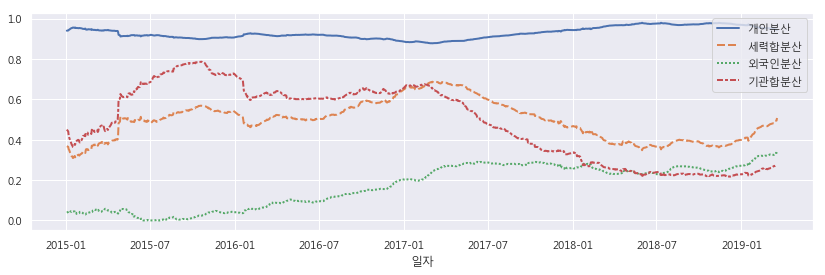

In [55]:
df_norm = newdf[['개인분산','세력합분산','외국인분산','기관합분산']]
sns.lineplot(data=df_norm.loc["2015":"2019"])